# UAS BERSAMA PRAKTIKKUM PDS

KELOMPOK 2
ANGGOTA :
1. Susan Jong (231401014)
2. Clarissa Halim (231401014)
3. Michael Purba (231401053)
4. Steven Winarta Girsang (231401059)


# Import Library -Susan Jong (231401014)
Import Library/Dependencies yang akan kalian gunakan disini


In [1]:
import matplotlib.pyplot as plt
import seaborn as sb 
import pandas as pd
import seaborn as sns
import numpy as np 
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy.stats import pearsonr
from scipy.stats import levene
import scipy.stats as stats
import scipy.stats as sp
from scipy.stats import kstest
import researchpy as rp
from statsmodels.sandbox.stats.runs import runstest_1samp
from fitter import Fitter
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Dataset - ( Steven Winarta Girsang - 231401059 )

Load Dataset-Dataset yang akan kalian gunakan disini

In [2]:
# Membaca data dari CSV
df = pd.read_csv('test.csv')
df


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral


In [3]:
df.rename(columns={'Daily_Usage_Time (minutes)': 'Daily_Usage_Time'}, inplace=True)
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral


In [4]:
df.describe()

,User_ID,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,521.262136,88.009709,2.864078,33.456311,13.766990,20.388350
std,288.949991,33.979087,1.732326,23.031426,8.107372,7.372755
min,16.000000,40.000000,1.000000,5.000000,2.000000,10.000000
25%,275.000000,60.000000,1.000000,15.000000,7.000000,15.000000
50%,526.000000,75.000000,2.000000,27.000000,12.000000,20.000000
75%,776.000000,105.000000,4.000000,40.000000,19.500000,25.000000
max,997.000000,200.000000,8.000000,110.000000,40.000000,45.000000


In [5]:
#User_ID
Q1 = df.User_ID.quantile(0.25)
Q3 = df.User_ID.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
Low_u = Q1 - 1.5*IQR
High_u = Q3 + 1.5*IQR
print(Low_u,High_u)

275.0 776.0
-476.5 1527.5


In [6]:
df[(df.User_ID<Low_u) | (df.User_ID > High_u)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [7]:
#Daily_usage_time
Q1 = df.Daily_Usage_Time.quantile(0.25)
Q3 = df.Daily_Usage_Time.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
Low_d = Q1 - 1.5*IQR
High_d = Q3 + 1.5*IQR
print(Low_d,High_d)

60.0 105.0
-7.5 172.5


In [8]:
df[(df.Daily_Usage_Time<Low_d) | (df.Daily_Usage_Time > High_d)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
70,846,30,Male,Instagram,175,7,100,33,38,Happiness
77,561,31,Male,Instagram,175,6,72,30,33,Happiness
87,304,28,Female,Instagram,200,8,110,40,45,Anxiety


In [9]:
#Posts_Per_Day
Q1 = df.Posts_Per_Day.quantile(0.25)
Q3 = df.Posts_Per_Day.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
Low_p = Q1 - 1.5*IQR
High_p = Q3 + 1.5*IQR
print(Low_p,High_p)

1.0 4.0
-3.5 8.5


In [10]:
df[(df.Posts_Per_Day<Low_p) | (df.Posts_Per_Day > High_p)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [11]:
#Likes_Received_Per_Day
Q1 = df.Likes_Received_Per_Day.quantile(0.25)
Q3 = df.Likes_Received_Per_Day.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
Low_l = Q1 - 1.5*IQR
High_l = Q3 + 1.5*IQR
print(Low_l,High_l)

15.0 40.0
-22.5 77.5


In [12]:
df[(df.Likes_Received_Per_Day	< Low_l) | (df.Likes_Received_Per_Day	 > High_l)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
5,428,25,Female,Instagram,160,6,85,26,30,Happiness
6,528,25,Female,Instagram,160,6,85,26,30,Happiness
13,328,25,Female,Instagram,160,6,85,26,30,Happiness
35,932,28,Male,Instagram,145,7,80,30,35,Happiness
46,651,Male,27,Instagram,165,6,85,30,28,Happiness
70,846,30,Male,Instagram,175,7,100,33,38,Happiness
79,849,32,Marie,Instagram,130,5,80,28,31,Neutral
87,304,28,Female,Instagram,200,8,110,40,45,Anxiety


In [13]:
#Comments_Received_Per_Day
Q1 = df.Comments_Received_Per_Day.quantile(0.25)
Q3 = df.Comments_Received_Per_Day.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
Low_c = Q1 - 1.5*IQR
High_c = Q3 + 1.5*IQR
print(Low_c,High_c)

7.0 19.5
-11.75 38.25


In [14]:
df[(df.Comments_Received_Per_Day < Low_c) | (df.Comments_Received_Per_Day > High_c)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
87,304,28,Female,Instagram,200,8,110,40,45,Anxiety


In [15]:
#Messages_Sent_Per_Day
Q1 = df.Messages_Sent_Per_Day.quantile(0.25)
Q3 = df.Messages_Sent_Per_Day.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
Low_m = Q1 - 1.5*IQR
High_m = Q3 + 1.5*IQR
print(Low_m,High_m)

15.0 25.0
0.0 40.0


In [16]:
df[(df.Messages_Sent_Per_Day < Low_m) | (df.Messages_Sent_Per_Day > High_m)]

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
87,304,28,Female,Instagram,200,8,110,40,45,Anxiety


## Data Baru setelah menghilangkan outliers

In [44]:
df2 = df
df2 = df2.drop([5,6,13,35,46,70,77,79,87,])
df2

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
98,184,22,Male,Twitter,70,1,20,5,22,Neutral
99,896,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,708,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,993,24,Male,Telegram,75,3,37,16,22,Neutral


# Data Processing -Michael Purba (231401053)
Lakukan Pemrosesan awal data kalian disini

In [43]:
df= pd.read_csv('test.csv')
df.columns= ['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']
df_backup = df.copy(deep=True)
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [25]:
# Agregasi data dalam bentuk count
df.groupby('platform')['daily_usage_time'].count().to_frame()


,daily_usage_time
platform,
Facebook,25
Instagram,16
LinkedIn,15
Snapchat,13
Telegram,11
Twitter,19
Whatsapp,4


In [26]:
# Agregasi data dalam bentuk 'mean'
df.groupby('platform')['daily_usage_time'].mean().to_frame()

,daily_usage_time
platform,
Facebook,73.800000
Instagram,150.312500
LinkedIn,57.000000
Snapchat,98.076923
Telegram,74.090909
Twitter,81.052632
Whatsapp,82.500000


In [27]:
# Agregasi data dalam bentuk 'median'
df.groupby('platform')['daily_usage_time'].median().to_frame()

,daily_usage_time
platform,
Facebook,75.0
Instagram,145.0
LinkedIn,55.0
Snapchat,115.0
Telegram,75.0
Twitter,75.0
Whatsapp,80.0


## Data Wrangling -Michael Purba (231401053)

Ubahlah data anda kedalam bentuk yang lebih masuk akal. Contohnya adalah :

Mengubah index atau label baris tabel

Agregasi data

Menggabungkan beberapa dataset menjadi satu

Mengatur ulang bagaimana data disajikan dalam tabel

Mengurutkan data dengan baik dan benar

Menyaring data sesuai kebutuhan

#### *Mengubah index atau label baris tabel*

Sebelumnya dari label tabel ada uppercase, ini diratain menjadi uppercase


In [22]:
df= df_backup.copy(deep=True)

df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df.head()

,user_id,age,gender,platform,daily_usage_time,posts_per_day,likes_received_per_day,comments_received_per_day,messages_sent_per_day,dominant_emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


### Agregasi data 

Menggunakan function .agg('cout','mean', 'median') dan .describe()

In [28]:
df.groupby('platform')['daily_usage_time'].agg(['count','mean','median'])

,count,mean,median
platform,,,
Facebook,25,73.800000,75.0
Instagram,16,150.312500,145.0
LinkedIn,15,57.000000,55.0
Snapchat,13,98.076923,115.0
Telegram,11,74.090909,75.0
Twitter,19,81.052632,75.0
Whatsapp,4,82.500000,80.0


In [30]:
# menggunakan function describe
df.groupby('platform')['daily_usage_time'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Facebook,25.0,73.800000,19.000000,40.0,60.0,75.0,80.00,110.0
Instagram,16.0,150.312500,21.944532,120.0,137.5,145.0,161.25,200.0
LinkedIn,15.0,57.000000,9.964222,45.0,50.0,55.0,60.00,85.0
Snapchat,13.0,98.076923,24.370274,50.0,85.0,115.0,115.00,120.0
Telegram,11.0,74.090909,20.102013,50.0,55.0,75.0,82.50,105.0
Twitter,19.0,81.052632,11.969747,70.0,70.0,75.0,90.00,105.0
Whatsapp,4.0,82.500000,15.000000,70.0,70.0,80.0,92.50,100.0


### Menggabungkan beberapa dataset menjadi satu 


In [45]:
# Lakukan inner join antara 'df' dan 'dfdua'
df_inner = pd.merge(df, df2, how='outer')
df_inner

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral
1,20,32,Female,Instagram,140,5,70,22,33,Happiness
2,33,23,Non-binary,Twitter,70,3,27,11,18,Neutral
3,35,29,Male,Facebook,65,2,22,8,20,Anxiety
4,48,26,Non-binary,Facebook,75,2,28,11,18,Anxiety
...,...,...,...,...,...,...,...,...,...,...
106,944,23,Non-binary,Facebook,105,2,25,12,18,Neutral
107,962,23,Male,Whatsapp,70,3,22,10,18,Anger
108,986,28,Female,Whatsapp,100,4,37,14,26,Anxiety
109,993,24,Male,Telegram,75,3,37,16,22,Neutral


### Untuk mengurutkan data dengan baik dan benar


In [79]:
# umurnya di urutkan terlebih dahulu
df.sort_values('Age')

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
7,773,21,Non-binary,Facebook,55,3,17,7,12,Neutral
30,847,21,Female,Twitter,90,3,37,14,20,Sadness
82,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral
...,...,...,...,...,...,...,...,...,...,...
50,783,34,Female,Instagram,120,5,60,25,25,Anger
14,372,35,Male,Twitter,70,1,13,8,10,Boredom
71,672,35,Male,Twitter,70,1,13,8,10,Boredom
39,872,35,Male,Twitter,70,1,13,8,10,Boredom


In [55]:
# Jika ascendingnya false, maka diurutkan berdasrkan ascending
df.sort_values('Age',ascending=False).head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
46,651,Male,27,Instagram,165,6,85,30,28,Happiness
39,872,35,Male,Twitter,70,1,13,8,10,Boredom
71,672,35,Male,Twitter,70,1,13,8,10,Boredom
14,372,35,Male,Twitter,70,1,13,8,10,Boredom
47,713,34,Male,LinkedIn,65,1,14,6,15,Boredom


In [83]:
# bagian ini yang akan diurutkan
df.sort_values(['Daily_Usage_Time','Age']).head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
82,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral
41,830,26,Non-binary,Facebook,45,1,8,4,12,Sadness
9,505,33,Male,LinkedIn,45,1,10,5,12,Boredom
91,205,33,Male,LinkedIn,45,1,10,5,12,Boredom
43,119,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral


### Untuk menyaring data sesuai kebutuhan

In [101]:
# hapus data yang di duplikat pada platform
df_inner = df_inner.groupby("Platform").sum()
df_inner=df_inner.fillna(0)

## Data Cleaning -Michael Purba (231401053)

- Hapus semua baris duplikat!
  
- Pastikan untuk data yang numerik, bahwa outlier sudah dibersihkan! Gunakan metode IQR.
  
- Jika ada kolom kosong, isi dengan data yang tepat!

In [96]:
# hapus data yang di duplikat pada platform
df_inner = df_inner.groupby("Platform").sum()
df_inner=df_inner.fillna(0)

In [97]:
df_inner

,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
Platform,,,,,
Facebook,2335,58,608,276,514
Instagram,2405,94,1257,431,509
LinkedIn,855,19,208,96,195
Snapchat,1505,43,480,222,344
Telegram,815,31,346,145,230
Twitter,1540,54,628,290,384
Whatsapp,330,12,105,46,84


### Metode IQR

In [50]:
#Messages_Sent_Per_Day
Q1 = df.Messages_Sent_Per_Day.quantile(0.25)
Q3 = df.Messages_Sent_Per_Day.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
Low_m = Q1 - 1.5*IQR
High_m = Q3 + 1.5*IQR
print(Low_m,High_m)

15.0 25.0
0.0 40.0


## Data Validation -Michael Purba (231401053)

Pastikan tipe data tiap kolom sudah tepat.

Pastikan semua nilai sudah masuk akal untuk tiap kolom. Gunakan operator Python untuk memastikan hal tersebut!

In [98]:
df_inner.dtypes #Type data sudah benar

Daily_Usage_Time             int64
Posts_Per_Day                int64
Likes_Received_Per_Day       int64
Comments_Received_Per_Day    int64
Messages_Sent_Per_Day        int64
dtype: object

In [99]:
df_inner


,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
Platform,,,,,
Facebook,2335,58,608,276,514
Instagram,2405,94,1257,431,509
LinkedIn,855,19,208,96,195
Snapchat,1505,43,480,222,344
Telegram,815,31,346,145,230
Twitter,1540,54,628,290,384
Whatsapp,330,12,105,46,84


# Analisis dan Explorasi Data - Susan Jong (231401014)
Lakukan Analisis dan Visualisasi terhadap data kalian

a. Univariate Analysis (Penjelasan tipe variabel tiap kolom (Kategorikal/Numerikal, Nominal/Ordinal/Interval/Rasio), Analisis komposisi tiap variabel, apakah variabel tersebut tersebar secara acak, bagaimana distribusinya untuk data kontinu, bentuk dan tipenya)

b. Penentuan Variabel (Tentukan siapa saja yang merupakan variabel independen dan dependen sesuai topik anda!)

c. Bivariate Analysis (Homoskedastisitas, Korelasi Numerikal dan Kategorikal, Hubungan Linearitas)

## CODINGAN BAGIAN A (UNIVARIATE ANALYSIS)

Penjelasan tipe variabel tiap kolom (Kategorikal/Numerikal, Nominal/Ordinal/Interval/Rasio)

Jawbannya disertai dengan penjelasan 
Dari data sheet yang kami ambil untuk dikerjakan ini adalah lebih condong  tipe variabel numerikal. Alasannya karena terdapat variabel yang menggambarkan nilai objek. Tetapi ada juga data yang termasuk ke dalam kategorikal juga. Sehingga ini terdapat 2 variabel yang salng mempengaruhinya. 

1. Data Numerikal 
   
Data Numerikal adalah variabel interval memiliki interval yang bermakna tetapi tidak ada nol sejati dan variabel rasio memiliki interval yang bermakna dan nol sejati
Contohnya dfalam datasheet kami adalah (umur, lamanya menggunakan sosmed, yang dipost tiap per hari, jumlah suka yang diterima tiap per hari, komenan yang diterima tiap per hari, pesan yang dikirim tiap per hari). 

2. Data Kategorikal 

Data Kategorikal adalah variabel yang mewakili tipe atau kategori dan mewakili data kuantitatif. Contohnya adalah (User_ID, jenis kelamin, platform sosmed yang digunakan, dan dominan emosi pada saat menggunakan platform sosmed tersebut)

Alasan User_ID dimasukkan kedalam data kategorikal karena variabel seperti ‘User_ID’ memang lebih cocok dikategorikan sebagai data kategorikal karena merupakan identitas unik yang tidak memiliki urutan atau nilai numerik. 

Penjelasan tiap variabel 

/> ‘Umur’ (Age): Ini adalah variabel rasio karena memiliki nilai nol yang bermakna (tidak ada umur) dan interval antara nilai-nilai yang konsisten.

/> ‘Platform yang Digunakan’ (Platform Used): Ini adalah variabel nominal karena mewakili kategori tanpa urutan alami. Misalnya, Facebook, Instagram, Twitter, dll., tidak memiliki urutan atau peringkat dan 'Gender', serta 'dominant_emotion'

/> ‘Total Likes yang Diterima’ (Total Likes Received): Ini adalah variabel rasio karena memiliki nilai nol yang bermakna (tidak ada ‘likes’) dan interval antara nilai-nilai yang konsisten.

/> ‘Lamanya Waktu yang Digunakan untuk Bermain Sosial Media’ (Time Spent on Social Media): Ini juga variabel rasio karena memiliki nilai nol yang bermakna (tidak ada waktu yang dihabiskan) dan interval antara nilai-nilai yang konsisten.


Variabel rasio memiliki titik nol absolut dan perbandingan antara dua nilai memiliki makna. Variabel interval mirip dengan rasio tetapi tidak memiliki titik nol absolut. Variabel ordinal memiliki urutan atau peringkat tetapi tidak memiliki interval yang konsisten antara peringkat. Variabel nominal hanya mengkategorikan data tanpa urutan atau peringkat.



Berikut codingannya untuk menunjukkn data ini adalah numerikal dan kategorikal

In [190]:
# Separate numerical and categorical data
#User id dimasukkan kedalam kategorial untuk menunjukkan bahwa data ini itu string 
df_numerikal = df[['Age', 'Daily_Usage_Time', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']]
df_kategorikal = df[['User_ID','Gender', 'Platform', 'Dominant_Emotion']]

df_numerikal 


,Age,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,27,120,4,40,18,22
1,21,60,1,18,7,12
2,28,115,3,38,18,27
3,27,105,3,48,20,28
4,21,55,3,17,7,12
...,...,...,...,...,...,...
98,22,70,1,20,5,22
99,33,85,4,35,18,18
100,24,110,6,35,23,25
101,24,75,3,37,16,22


Jawaban dari hasil Pearson bagian C di hasil mencari hubungan linearitas dapat dibuktikan bahwa yang digunakan sedangkan p-Value hasilnya 0,25 yang dimana hasilnya diatas dari 0,05 yang tidak menunjukkan hubungan korelasi yang signifikan secara statistik antara dua variabel. Ini berarti bahwa hubungan  korelasi yang diamati kemungkinan besar disebabkan 
oleh kesempatan acak daripada hubungan sebenarnya antara variabel.


In [191]:
df_kategorikal

,User_ID,Gender,Platform,Dominant_Emotion
0,500,Female,Snapchat,Neutral
1,488,Non-binary,Snapchat,Neutral
2,776,Non-binary,Snapchat,Anxiety
3,869,Male,Telegram,Anxiety
4,573,Non-binary,Facebook,Neutral
...,...,...,...,...
98,184,Male,Twitter,Neutral
99,896,Male,LinkedIn,Boredom
100,708,Non-binary,Facebook,Sadness
101,993,Male,Telegram,Neutral


Bentuk dan tipe dari distribusi normal ini hasilnya adalah jika sebuah garis mengikuti distribusi ‘norm’ dengan cukup dekat, ini menunjukkan bahwa data tersebut terdistribusi normal, yang merupakan asumsi umum untuk banyak tes statistik.

Distribusi ‘chi’ miring ke kanan, menunjukkan bahwa lebih banyak data jatuh di ujung bawah.

Distribusi ‘f’ memiliki puncak di sebelah kiri dan menurun dengan cepat, yang bisa khas untuk rasio varians.
x
Distribusi ‘t’ tampak mirip dengan distribusi normal tetapi dengan ekor yang lebih berat, yang mungkin menunjukkan lebih banyak outlier.

In [19]:
# Memasukkan data framenya terlebih dahulu 
df = pd.DataFrame(columns = ['df_numerikal', 'df_kategorikal'])
df.iloc[:,0] = df_numerikal
df.iloc[:,1] = df_kategorikal
df.convert_dtypes().dtypes
df

,df_numerikal,df_kategorikal
0,27,500
1,21,488
2,28,776
3,27,869
4,21,573
...,...,...
98,22,184
99,33,896
100,24,708
101,24,993


2024-06-17 13:00:53.077 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.004958)
2024-06-17 13:00:53.522 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi distribution with error=0.001984)
2024-06-17 13:00:53.688 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted f distribution with error=0.002059)
2024-06-17 13:00:53.733 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted t distribution with error=0.003049)


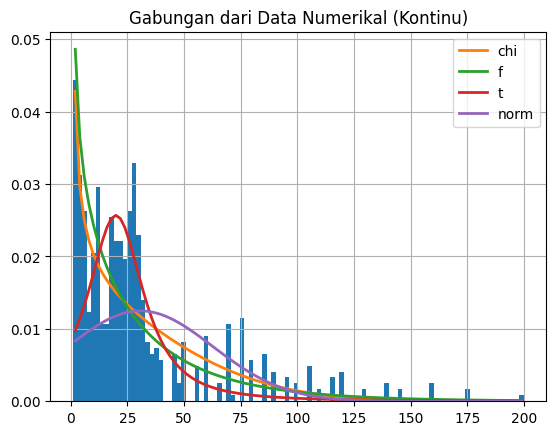

In [20]:
# Jika tidak mengubah menjadi nilai maka nanti tabelnya akan muncul inf dan NaaN saja, nilainya tidak muncul 
# untuk mengganti inf menjadi NaaN 

df_numerikal = df_numerikal.apply(pd.to_numeric, errors='coerce')
df_numerikal.replace([np.inf, -np.inf], np.nan, inplace=True)
# Meletakkan NaaN menjadi suatu nilai 
df_numerikal.dropna(inplace=True)
#output data
f = Fitter(data=df_numerikal[['Age', 'Daily_Usage_Time', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']], distributions=['norm','chi','f','t'])
f.fit()
f.summary()
plt.title('Gabungan dari Data Numerikal (Kontinu)')
plt.show()

Pembuktian apakah data ini terdistribusi normal atau tidak, sudah dibuat hasil dari code diatas dengan menggunakan grafik hasilnya tidak sesuai dengan aturan distribusi normal yang dimana ini ada indikasi terjadinya data yang kita ambil untuk diuji tidak termasuk kedalam distribusi normal 

Selanjutnya dibuat codingan untuk memastikan apakah hipotesis data tidak terdistribusi dengan normal betul/tidak 

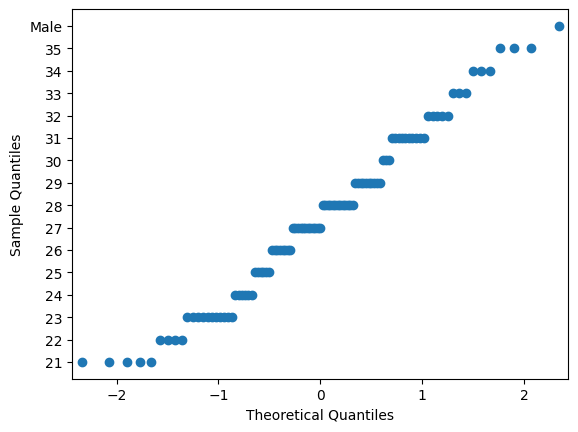

In [21]:
# kita buat terlebih dahulu untuk nilai numerikal dengan menggunakan QQ-plot
fig = sm.qqplot(df['df_numerikal'])
plt.show()

In [26]:
import pandas as pd
import numpy as np
from scipy import stats

# Membuat DataFrame untuk menyimpan nilai statistik dan p-value
testResults = pd.DataFrame(index=['Statistic', 'p-Value'])

# Tes Omnibus
statistic, p_value = stats.normaltest(df['df_numerikal'])
testResults.loc['Statistic', 'Omnibus'] = statistic
testResults.loc['p-Value', 'Omnibus'] = p_value

# Tes Shapiro-Wilk
statistic, p_value = stats.shapiro(df['df_numerikal'])
testResults.loc['Statistic', 'Shapiro-Wilk'] = statistic
testResults.loc['p-Value', 'Shapiro-Wilk'] = p_value

# Tes Kolmogorov-Smirnov
statistic, p_value = stats.kstest((df['df_numerikal'] - np.mean(df['df_numerikal'])) / np.std(df['df_numerikal'], ddof=1), 'norm')
testResults.loc['Statistic', 'Kolmogorov-Smirnov'] = statistic
testResults.loc['p-Value', 'Kolmogorov-Smirnov'] = p_value

# Menampilkan hasil tes
print(testResults)


            Omnibus  Shapiro-Wilk  Kolmogorov-Smirnov
Statistic  4.860410      0.970887            0.081109
p-Value    0.088019      0.023607            0.488188


Hasilnya dari uji coba dapat disimpulkan bahwa data tersebut tidak terdistribusi dengan normal dikarenakan hasil dari QQ-plot sudah tidak berada di sepanjang garis lurus diagonal begitu juga dengan hasil dari p-Value uji statistiknya cenderung dibawah tingkat spesifikasinya yaitu 0,05 dari hasilnya sehingga menolak dikatakan data ini dapat terdistribusi dengan normal 

Jawabannya data tersebut variabel numerikal tidak terdistribusi dengan normal dan data tersebut tersebar secara acak 

## CODINGAN BAGIAN B 

Soalnya adalah penentuan Variabel (Tentukan siapa saja yang merupakan variabel independen dan dependen sesuai topik anda!)

Jawabannya:Koefisien korelasi jumlah likes yang diterima per hari dengan variabel lainnya memiliki rata-rata yang paling besar dibandingkan variabel lain.

Oleh karena itu, kita memilih jumlah likes yang diterima per hari sebagai variabel dependen yang lainnya sebagai variabel independen.

Kemudian dilihat bahwa lamanya menggunakan sosmed berkorelasi kuat dengan variabel target, begitu juga dengan *posts*, *comments*, dan pesan yang perhari. Umur berkorelasi lemah, sehingga tidak perlu dipakai.



## CODINGAN BAGIAN C 

## Untuk menentukan bagian Homoskedastisitas

In [78]:
# inisiasi data untuk dimasukkan kedalam kelompok dalam menentukan korelitas datanya
dataindepedent_df = df[['Platform','Daily_Usage_Time']]
dependent_df = df[['Age', 'Gender']]


In [83]:
grouped_data = [group['Daily_Usage_Time'].values for name, group in dataindepedent_df.groupby('Platform')]

# menggunakan stats.levene untuk menguji hasilnya dan p-Value
stat, p_value = stats.levene(*grouped_data, center='mean')
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p_value}")

# Menentukan data homoksedastisitas dengan menggunakan if-else untuk mendapatkan jawabannya 
# ditentukan dengan mengacu pada hasil dari P-valuenya
if p_value < 0.05: 
    print("Data tersebut adalah homoskedastisitas (varians kurang lebih sama)")
else: 
    print("Data tersebut adalah heteroskedastisitas (varians tidak sama)")


Levene's test statistic: 3.0428492777487066
P-value: 0.009084411804541745
Data tersebut adalah homoskedastisitas (varians kurang lebih sama)


### Untuk menunjukkan korelasi Numerikal dan Kategorikal

Untuk menunjukkan korelasi Numerikal terlebih dahulu 

In [28]:
df_numerikal 

,Age,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,27.0,120,4,40,18,22
1,21.0,60,1,18,7,12
2,28.0,115,3,38,18,27
3,27.0,105,3,48,20,28
4,21.0,55,3,17,7,12
...,...,...,...,...,...,...
98,22.0,70,1,20,5,22
99,33.0,85,4,35,18,18
100,24.0,110,6,35,23,25
101,24.0,75,3,37,16,22


In [29]:
#numeric_only=True digunakan untuk agar dapat menerima data yang berupa string yaitu dibagian gender
df_numerikal.corr(numeric_only=True)

,Age,Daily_Usage_Time,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
Age,1.000000,0.113524,0.037041,0.117446,0.111302,0.102568
Daily_Usage_Time,0.113524,1.000000,0.866098,0.920598,0.885871,0.878829
Posts_Per_Day,0.037041,0.866098,1.000000,0.923291,0.932984,0.861668
Likes_Received_Per_Day,0.117446,0.920598,0.923291,1.000000,0.939576,0.899657
Comments_Received_Per_Day,0.111302,0.885871,0.932984,0.939576,1.000000,0.879264
Messages_Sent_Per_Day,0.102568,0.878829,0.861668,0.899657,0.879264,1.000000


Untuk terlihat koefisien korelasi antar tiap variabel. Akan lebih baik menggunakan visualiasi heatmap

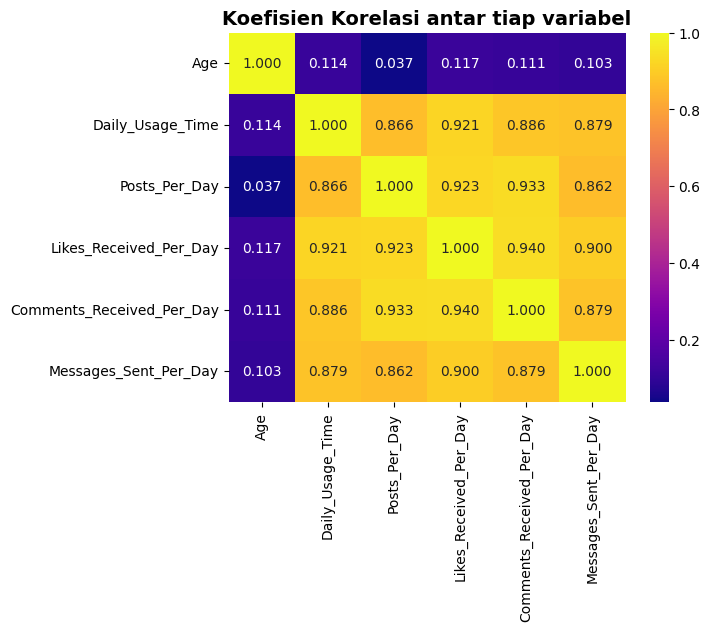

In [30]:
# parameter cmap untuk palet warna, annot untuk ditulis koefisien
# dan fmt untuk format angka, .3f berarti 3 angka dibelakang koma dan float
heatmap = sns.heatmap(data=df_numerikal.corr(method='pearson', numeric_only=True),
                      cmap='plasma', annot=True, fmt=".3f")
heatmap.set_title('Koefisien Korelasi antar tiap variabel', fontsize=14, fontweight='bold')
plt.show()


-- Untuk menunjukkan data korelasi kategorikal 


In [32]:
df_kategorikal

,User_ID,Gender,Platform,Dominant_Emotion
0,500,Female,Snapchat,Neutral
1,488,Non-binary,Snapchat,Neutral
2,776,Non-binary,Snapchat,Anxiety
3,869,Male,Telegram,Anxiety
4,573,Non-binary,Facebook,Neutral
...,...,...,...,...
98,184,Male,Twitter,Neutral
99,896,Male,LinkedIn,Boredom
100,708,Non-binary,Facebook,Sadness
101,993,Male,Telegram,Neutral


Karena dari data yang diatas masih terlihat dalam bentuk teks, sehingga diubah ke angka terlebih dahulu. Langkah pertama diperlihatkan ada beberapa nilai untuk tiap kolom 

In [34]:
for i in df_kategorikal.columns:
  print("Jumlah nilai unik untuk kolom {} adalah {}".format(i, df_kategorikal[i].nunique()))


Jumlah nilai unik untuk kolom User_ID adalah 98
Jumlah nilai unik untuk kolom Gender adalah 5
Jumlah nilai unik untuk kolom Platform adalah 7
Jumlah nilai unik untuk kolom Dominant_Emotion adalah 6


In [35]:
#buat data pemberian nilainya, untuk mengubahnya tidak kebentuk string
map_Data = {
    "Snapchat": 0, "Telegram": 1, "Facebook": 2, "Instagram": 3, "Twitter": 4, "LinkedIn": 5, "Whatsapp": 6,
    "Neutral": 0, "Anxiety": 1, "Boredom": 2, "Sadness": 3, "Happiness": 4, "Anger": 5,
    "Female": 1, "Male": 0 ,"Non-binary": -1,"Marie": 2
    }

df_kategori_cleaned = pd.DataFrame()
# Kolom 'Gender' langsung dimasukkan ke DataFrame baru
df_kategori_cleaned['User_ID'] = df_kategorikal['User_ID']
# Petakan dan masukkan nilai-nilai dari kolom lain
for col in df_kategorikal.columns:
    if col != 'User_ID':
        df_kategori_cleaned[col] = df_kategorikal[col].map(map_Data)
print(df_kategori_cleaned)


     User_ID  Gender  Platform  Dominant_Emotion
0        500     1.0         0                 0
1        488    -1.0         0                 0
2        776    -1.0         0                 1
3        869     0.0         1                 1
4        573    -1.0         2                 0
..       ...     ...       ...               ...
98       184     0.0         4                 0
99       896     0.0         5                 2
100      708    -1.0         2                 3
101      993     0.0         1                 0
102       60     0.0         2                 2

[103 rows x 4 columns]


In [36]:
df_kategori_cleaned

,User_ID,Gender,Platform,Dominant_Emotion
0,500,1.0,0,0
1,488,-1.0,0,0
2,776,-1.0,0,1
3,869,0.0,1,1
4,573,-1.0,2,0
...,...,...,...,...
98,184,0.0,4,0
99,896,0.0,5,2
100,708,-1.0,2,3
101,993,0.0,1,0


--Untuk membuat 2 heatmap yang berisi spearman dan kendall yang akan menampilkan hasil korelasi spearman dan kendall 

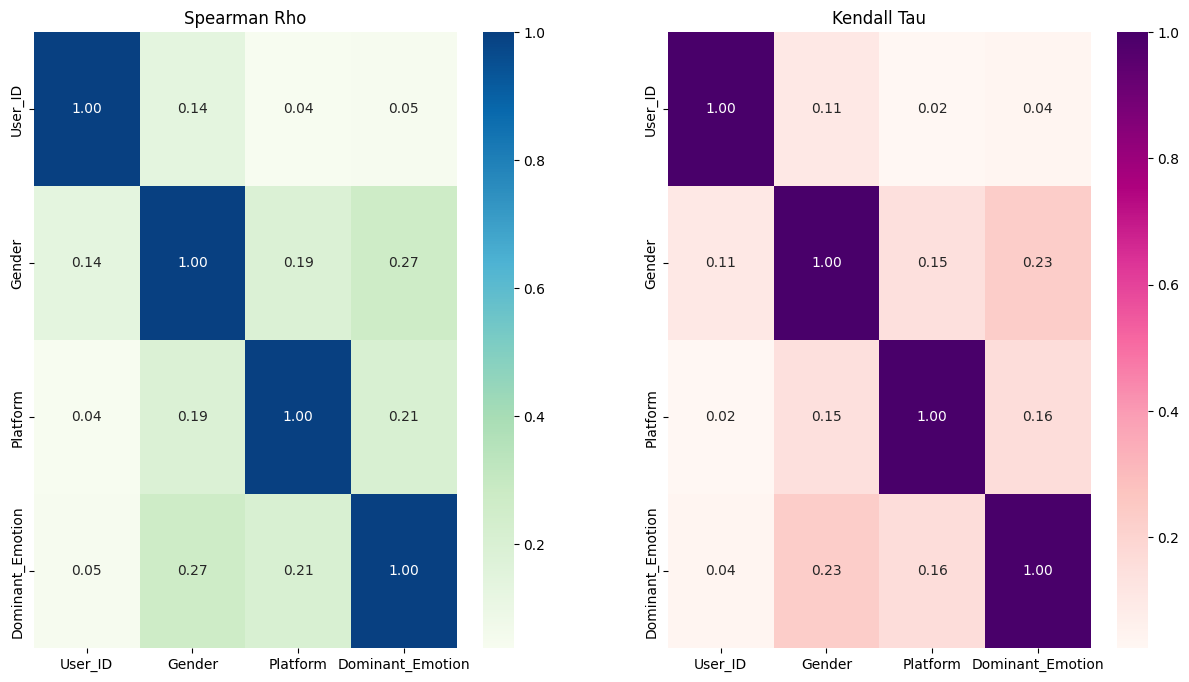

In [37]:
fig = plt.figure(figsize = (15,8))

# Kita buat 2 bagian, 1 baris 2 kolom pada figur
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Kita taruh heatmap pada 2 bagian figur tadi
sns.heatmap(
    data=df_kategori_cleaned.corr(method = 'spearman'),
    annot = True,
    fmt = ".2f",
    cmap = "GnBu",
    ax = ax1
)
sns.heatmap(
    data=df_kategori_cleaned.corr(method = 'kendall'),
    annot = True,
    fmt = ".2f",
    cmap = "RdPu",
    ax = ax2
)
# Kita ubah judul grafik
ax1.set_title('Spearman Rho')
ax2.set_title('Kendall Tau')

plt.show()

## Hubungan Linearitas

In [38]:
# untuk mendukung operasi string 

df_numerikal['Age'] = pd.to_numeric(df_numerikal['Age'], errors='coerce')
df_numerikal['Daily_Usage_Time'] = pd.to_numeric(df_numerikal['Daily_Usage_Time'], errors='coerce')

aligned_df = df_numerikal.dropna(subset=['Age', 'Daily_Usage_Time'])

corr, p_value = pearsonr(aligned_df['Age'], aligned_df['Daily_Usage_Time'])
# mencetak hasilnya 
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.11352424681822627
P-value: 0.25592087440695466


Jawaban dari hasil Pearson dapat dibuktikan bahwa sangat lemah korelasi kuat antara umur dengan penggunaan sosial media dari platform
yang digunakan sedangkan p-Value hasilnya 0,25 yang dimana hasilnya diatas dari 0,05 yang tidak menunjukkan hubungan korelasi yang 
signifikan secara statistik antara dua variabel. Ini berarti bahwa hubungan  korelasi yang diamati kemungkinan besar disebabkan 
oleh kesempatan acak daripada hubungan sebenarnya antara variabel.





# Hypothesis Testing - (Susan Jong 231401014) 

Lakukan Uji Hipotesa (Jelaskan apa yang ingin kalian uji, hipotesa null, tes statistik yang
digunakan)


## CARA KE 1 UNTUK MEMBUKTIKAN BAHWA INI ADALAH HIPOTESIS NULL

In [39]:

#uji hipotesa null 
sample_data = df_numerikal['Age']
ks_statistic, p_value = kstest(sample_data, 'norm')
# Melkaukan pengecekkan
alpha = 0.05  # significance level
if p_value < alpha:
    print("Menolak hipotesis null- data tidak sesuai dengan mengikuti distribusi normal")
else:
    print("Gagal menolak hipotesis null- data tidak sesuai dengan mengikuti distribusi normal")


Menolak hipotesis null- data tidak sesuai dengan mengikuti distribusi normal


## CARA KEDUA UNTUK MEMBUKTIKAN BAHWA INI ADALAH HIPOTESIS NULL DENGAN MENGGUNAKAN UJI RUNS TEST

In [40]:
# Mengecek kolom apa saja yang ada 
list(df.columns)

['df_numerikal', 'df_kategorikal']

In [41]:
# Melihat berapa baris dataa
df.shape[0]

102

In [43]:
# Melakukan runs test pada Kolom 'df_numerikal'
runstest_1samp(df['df_numerikal'],cutoff='median',correction=True)

(-0.9663469762146968, 0.3338705870291442)

In [55]:
# Lihat data csv yang kami ambil yaitu df_numerikal yang telah diinsiasi sebelumnya yaitu Age
df_total= df['df_numerikal']
df_total

0      27.0
1      21.0
2      28.0
3      27.0
4      21.0
       ... 
98     22.0
99     33.0
100    24.0
101    24.0
102    27.0
Name: df_numerikal, Length: 102, dtype: float64

In [47]:
# Kita lihat jumlah baris yang kita miliki
number_of_rows = df_numerikal['Daily_Usage_Time'].shape[0]
print(number_of_rows)


102


In [52]:
# Langsung gunakan 'df_total' yang dimana perwakilan dari df_numerikal
runs_test_result = sm.stats.runstest_1samp(df_total, cutoff='median', correction=True)
print(runs_test_result)


(-0.9663469762146968, 0.3338705870291442)


Jawabannya dari uji hipotesis- Runs test dapat dibuktikan bahwa nilai p-Value adalah 0.96. Jika nilai batas yang digunakan adalah 0.05, maka bisa **kita simpulkan bahwa punya cukup bukti untuk menolak hipotesa null, yang dimana pernyataan yang tidak ada hubungan antara variabel 'df_numerikal' yaitu (Umur) yang telah diinsiasi 'df-numerikal menjadi umur**

Saya menggunakan uji coba hipotesis dengan menggunakan- Runs test, karena runs test adalah sebuah uji statistik yang digunakan untuk melihat apakah sebuah kumpulan data/sampel merupakan variabel yang dikumpulkan secara acak. Banyak tes statistika yang lainnya yang menggunakan asumsi, dengan kata lain mengharuskan, bahwa data dikumpulkan secara acak (random). Itulah kegunaan dari runs test.

Runs test dalam statsmodels mengambil 3 parameter, yaitu :
1. Data (Data yang akan dites keacakannya)
2. Cutoff (Pembatas)
3. Correction (Koreksi nilai)

Yang dimana ini sangat mendukung untuk melakukan ujicoba dengan menggunakan -runs test karena paramaternya cukup banyak dan lengkap sekali sehingga dapat melakukan pemeriksaannya lebih jelas dan rinci. Runs test melihat apakah sebuah data termasuk acak atau tidak dengan mengambil titik tengah data, karena non-parametrik kita gunakan median, dan mengelompokkan data menjadi diatas dan dibawah titik tengah. Kemudian, dengan melihat pola dari silih ganti apakah data berada diatas atau dibawah titik tengah, akan membandingkan pola silih ganti tersebut dengan sebuah tabel distribusi kumulatif.

# Regression Model Creation - Clarissa Halim (231401020)

Bangun model kalian! Pilih variabel independen dan dependen sesuai dengan analisis kalian sebelumnya!


 **Visualisasi Korelasi antar Variabel**

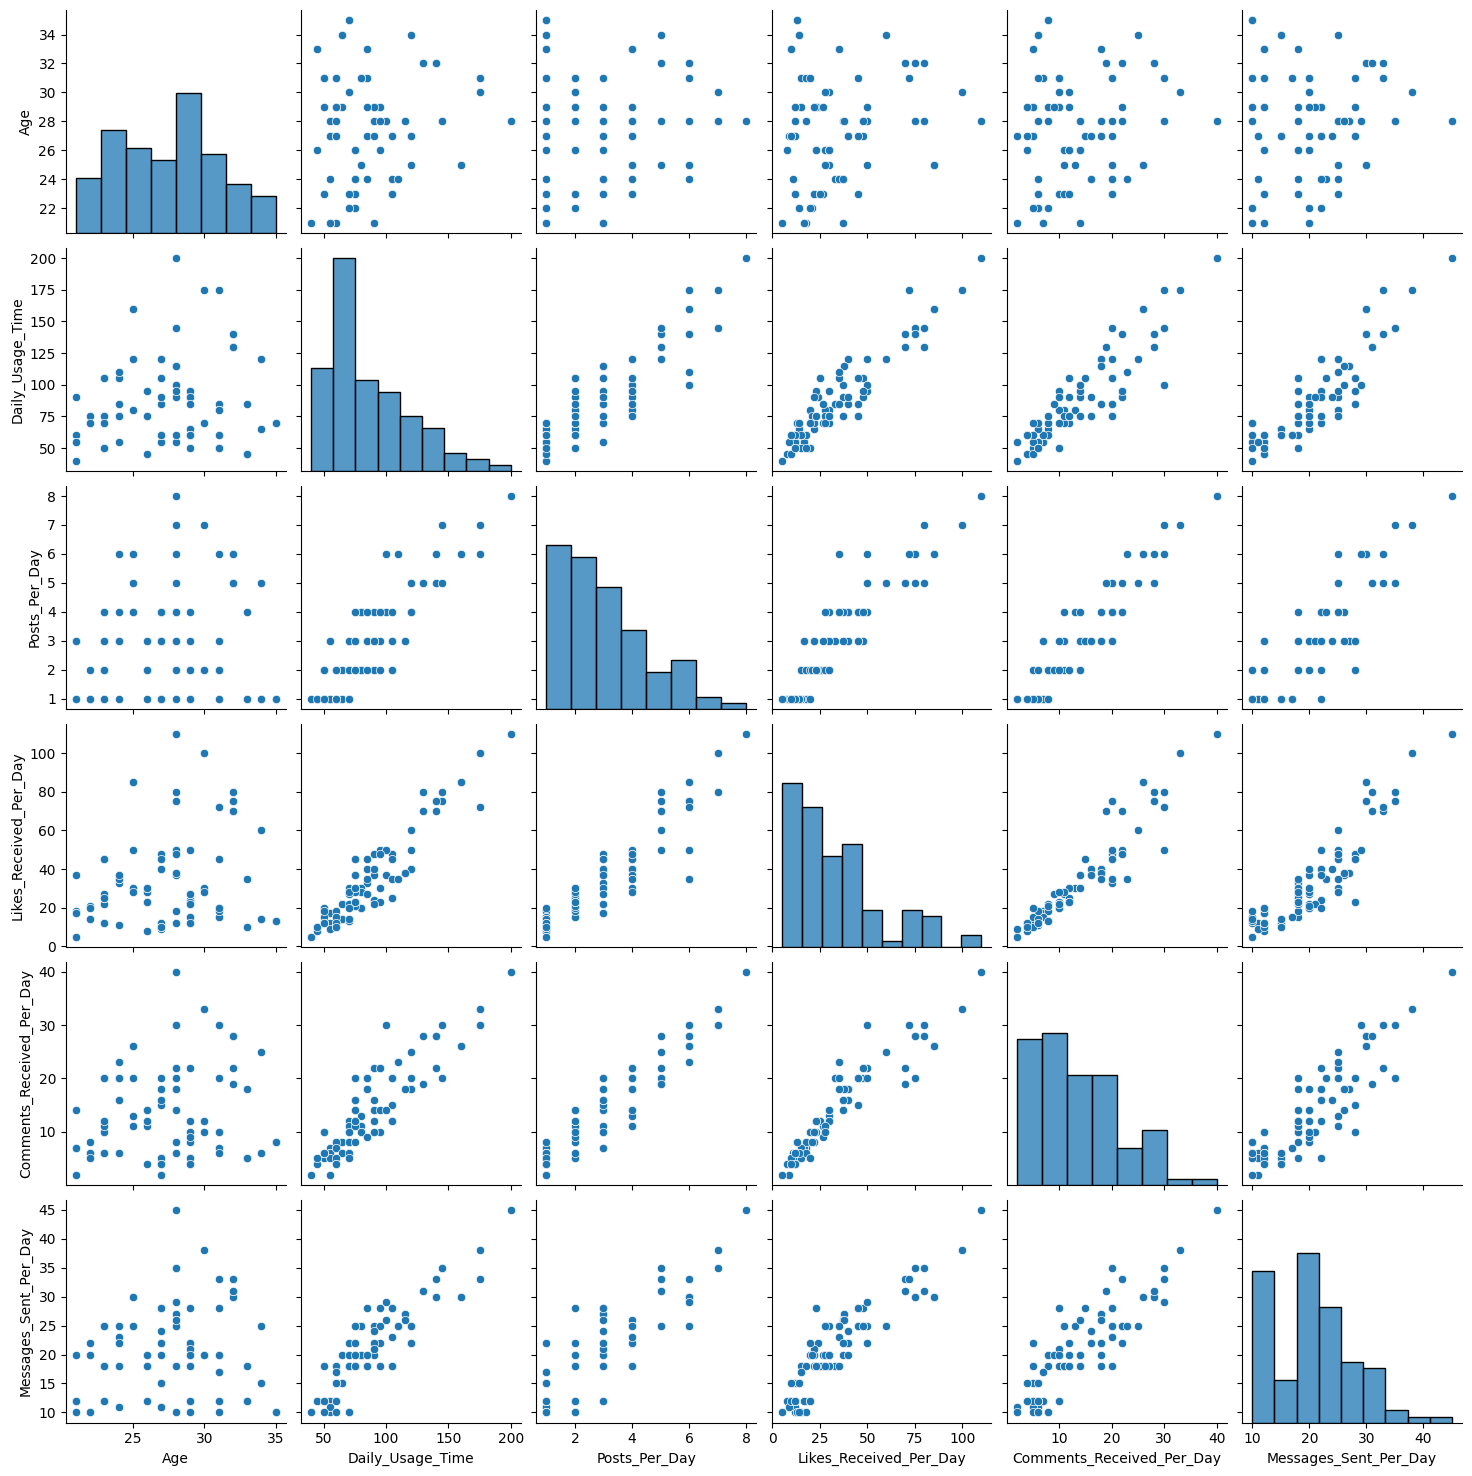

In [56]:
sns.pairplot(df_numerikal)
plt.show()

Dari visualisasi data diatas, diperoleh bahwa diantara semua variabel, jumlah likes yang diterima per hari memiliki korelasi yang paling kuat dengan variabel lain.

Selanjutnya, kita buktikan lagi dengan *Correlation Heatmap / Matrix*

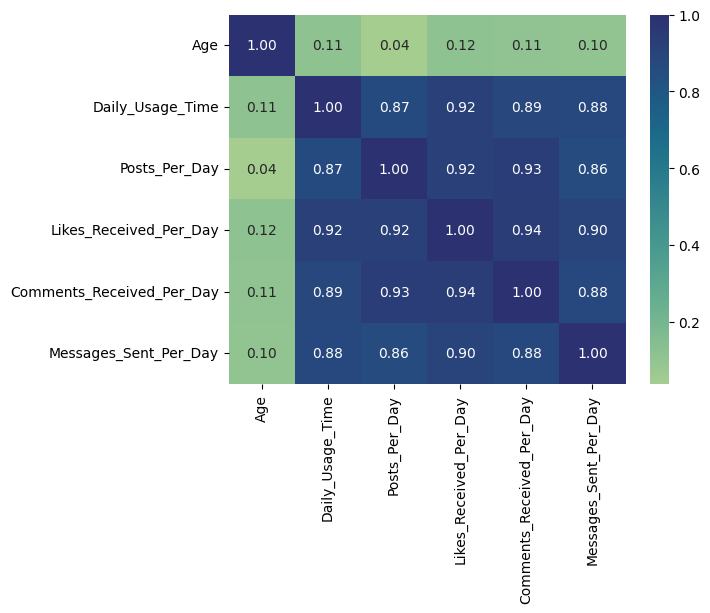

In [57]:
sns.heatmap(data = df_numerikal.corr(), annot = True, fmt = ".2f", cmap = "crest")
plt.show()

Koefisien korelasi jumlah likes yang diterima per hari dengan variabel lainnya memiliki rata-rata yang paling besar dibandingkan variabel lain.

Oleh karena itu, kita memilih jumlah likes yang diterima per hari sebagai variabel dependen yang lainnya sebagai variabel independen.

Kemudian dilihat bahwa lamanya menggunakan sosmed berkorelasi kuat dengan variabel target, begitu juga dengan *posts*, *comments*, dan pesan yang perhari. Umur berkorelasi lemah, sehingga tidak perlu dipakai.


In [63]:
# Berdasarkan korelasi, kita memilih 'Likes_received_Per_Day' sebagai variabel dependen dan yang lainnya sebagai variabel independen
X = df_numerikal[['Age', 'Posts_Per_Day', 'Daily_Usage_Time', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']]
Y = df_numerikal['Likes_Received_Per_Day']

# Bagi data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, Y_train)

# Prediksi dengan data uji
Y_pred = model.predict(X_test)

# Regression Model Evaluation - Clarissa Halim (231401020)
Evaluasi hasil model kalian! Lakukan prediksi, lalu gunakan sebuah pengukuran (baik RMSE, R-squared, dan Adjusted R-squared) untuk mengukur akurasi model kalian! Jangan lupa untuk menginterpretasi hasil F-test!

In [64]:
# Fit the regression model
model = smf.ols('Likes_Received_Per_Day ~Posts_Per_Day+Daily_Usage_Time+Comments_Received_Per_Day+Messages_Sent_Per_Day', data=df_numerikal).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Likes_Received_Per_Day   R-squared:                       0.931
Model:                                OLS   Adj. R-squared:                  0.928
Method:                     Least Squares   F-statistic:                     325.5
Date:                    Mon, 17 Jun 2024   Prob (F-statistic):           2.83e-55
Time:                            13:17:38   Log-Likelihood:                -325.99
No. Observations:                     102   AIC:                             662.0
Df Residuals:                          97   BIC:                             675.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Interpretasi Hasil

*   R-squared sebesar 0.931 menunjukkan bahwa 93.1% variansi dalam Likes_Received_Per_Day dapat dijelaskan oleh model ini.

*  Adj. R-Squared sebesar 0.928 menunjukkan penyesuaian terhadap jumlah variabel independen, yang masih tinggi dan menunjukkan model memiliki kecocokan yang baik.

In [65]:
# Menghitung Nilai RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print ("RMSE : ",rmse)

RMSE :  5.3632411418964105




*   Model regresi linear yang dibuat menunjukkan nilai RMSE sebesar 5.36. Ini berarti rata-rata kesalahan prediksi model adalah sekitar 5.36 likes per hari. Dalam konteks data, jika rentang Likes_Received_Per_Day berkisar antara 0 hingga 100, kesalahan ini dianggap dapat diterima, menunjukkan model memiliki akurasi yang cukup baik. Namun, jika rentang nilai lebih kecil, model ini mungkin kurang akurat dan memerlukan perbaikan lebih lanjut.

In [66]:
print (model.summary())

                              OLS Regression Results                              
Dep. Variable:     Likes_Received_Per_Day   R-squared:                       0.931
Model:                                OLS   Adj. R-squared:                  0.928
Method:                     Least Squares   F-statistic:                     325.5
Date:                    Mon, 17 Jun 2024   Prob (F-statistic):           2.83e-55
Time:                            13:18:32   Log-Likelihood:                -325.99
No. Observations:                     102   AIC:                             662.0
Df Residuals:                          97   BIC:                             675.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Hasil F-Test dengan F-statistic sebesar 259.8 dan p-value sebesar 3.77e-54 adalah sangat kecil (diasumsikan 0.0000) menunjukkan bahwa model secara keseluruhan sangat signifikan, yang berarti setidaknya satu variabel independen memiliki hubungan yang signifikan dengan variabel dependen. Secara keseluruhan, model ini memiliki performa yang baik dan dapat memberikan prediksi yang akurat serta signifikan.